In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## MLP Classification on Adult dataset

Importing Sklearn packages for MLP classification

In [3]:
adult_dataset = pd.read_csv("cleaned_adult_dataset.csv")

Check structure of dataset

In [17]:
adult_dataset.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Other,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age_standardized,fnlwgt_standardized,education-num_standardized,capital-gain_standardized,capital-loss_standardized,hours-per-week_standardized
0,22,231912,11,0,0,0,37,39,0,0,...,0,0,0,1,-1.432592,0.414917,0.154377,-0.196967,-0.258317,-0.421552
1,79,165209,9,1,0,0,40,39,0,0,...,0,0,0,1,2.967552,-0.228631,-0.611251,-0.196967,-0.258317,-0.174957
2,43,47818,13,0,0,0,40,39,0,0,...,0,0,0,1,0.188514,-1.361216,0.920005,-0.196967,-0.258317,-0.174957
3,29,565769,1,1,0,0,40,35,0,0,...,0,1,0,0,-0.892223,3.635959,-3.673763,-0.196967,-0.258317,-0.174957
4,57,222216,11,0,0,0,38,39,0,0,...,0,0,0,1,1.269251,0.321370,0.154377,-0.196967,-0.258317,-0.339354


Split dataframe into X (features) and y (target variable: income)

In [5]:
X_adult = adult_dataset.drop('income', axis=1)
y_adult = adult_dataset['income']

The 'fnlwgt' column, which estimates the 16+ population for each area will be scaled as it has not been yet

In [6]:
scaler = StandardScaler()
X_adult[['fnlwgt']] = scaler.fit_transform(X_adult[['fnlwgt']])

Split dataset into training and test sets

In [7]:
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_adult, y_adult, test_size=0.2, random_state=42, stratify=y_adult)

Create the MLP classifier with max iteration set to 1000

In [8]:
mlp_C = MLPClassifier(max_iter=1000)

Define the hyperparameters used for grid search to find the most optimal

In [9]:
parameter_space_C = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

Use 5-fold cross validation to perform the grid search and find the most optimal hyperparameters

In [10]:
clf_C = GridSearchCV(mlp_C, parameter_space_C, n_jobs=-1, cv=5)
clf_C.fit(X_train_C, y_train_C)

/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

Print out the best parameters

In [11]:
best_params_C = clf_C.best_params_
print("Best parameters found:", best_params_C)

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


As seen above, the 'relu' activation function was found to perform stronger than 'tanh'. <br> The three hidden layers of 50 neurons each performed better than the other two
 <br> 'adam' was found to be the better weight optimiser <br>
 The lower L2 regularisation rate (alpha) of 0.0001 was found to be better <br>
 the adaptive learning rate was found to be better than the constant learning rate

Make predictions on the test set

In [12]:
y_pred_C = clf_C.predict(X_test_C)

Print out the F1 score (harmonic mean of precision and recall)

In [13]:
f1_C = f1_score(y_test_C, y_pred_C)
print("F1 Score:", f1_C)

F1 Score: 0.8228571428571428


Generate and output the confusion matrix <br>
Seaborn was having issues outputting the bottom half of the matrix, so matplotlib is used instead of a seaborn heatmap

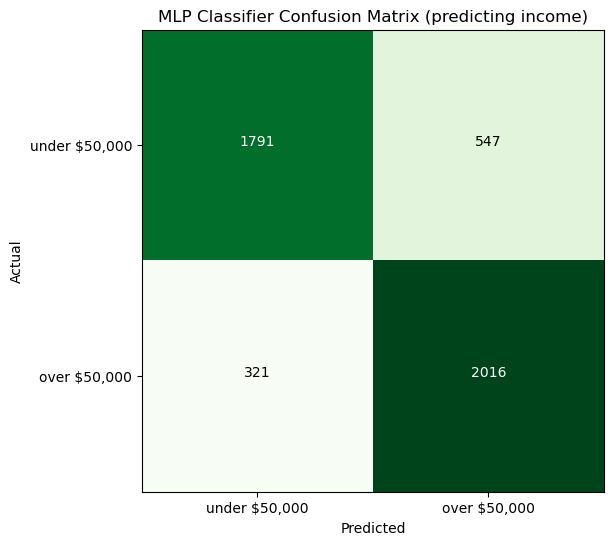

In [18]:
conf_matrix_C = confusion_matrix(y_test_C, y_pred_C)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_C, cmap=plt.cm.Greens)
plt.title('MLP Classifier Confusion Matrix (predicting income)')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['under $50,000', 'over $50,000'])
plt.yticks(tick_marks, ['under $50,000', 'over $50,000'])

thresh = conf_matrix_C.max() / 2.
for i, j in np.ndindex(conf_matrix_C.shape):
    plt.text(j, i, format(conf_matrix_C[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_C[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Generate and output the ROC curve

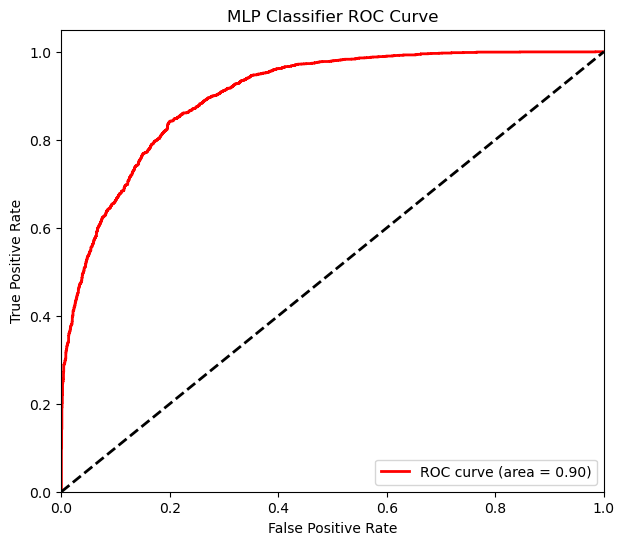

In [15]:
y_prob_C = clf_C.predict_proba(X_test_C)[:, 1]
fpr, tpr, _ = roc_curve(y_test_C, y_prob_C)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

Print the overall classification report and accuracy

In [25]:
report_C = classification_report(y_test_C, y_pred_C)
accuracy_C = accuracy_score(y_test_C, y_pred_C)

print("Classification Report:\n", report_C)
print("Accuracy:", accuracy_C)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.80      2338
           1       0.79      0.86      0.82      2337

    accuracy                           0.81      4675
   macro avg       0.82      0.81      0.81      4675
weighted avg       0.82      0.81      0.81      4675

Accuracy: 0.814331550802139


## MLP Regression on Rent Dataset

Import and set up the rent dataset <br>
X (features) and y (target var: rent of apartments)

In [26]:
rent_apartment = pd.read_csv("cleaned_rent_apartment.csv")

X_rent = rent_apartment.drop('price', axis = 1)
y_rent = rent_apartment['price']

Scale the remaining numerical columns

In [27]:
X_rent[['latitude', 'longitude', 'time']] = scaler.fit_transform(X_rent[['latitude', 'longitude', 'time']])

Set up train and test split

In [28]:
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_rent, y_rent, test_size=0.2, random_state=42)


Set up MLP Regressor

In [29]:
mlp_R = MLPRegressor(max_iter=1000, random_state=42)

Set up parameter space for grid search

In [30]:
parameter_space_R = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

Set up the grid search and fit the data

In [31]:
grid_search_R = GridSearchCV(mlp_R, parameter_space_R, n_jobs=-1, cv=5)
grid_search_R.fit(X_train_R, y_train_R)

/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukemenezes/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/l

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

Get the best parameters and evaluate the model on the test data

In [32]:
best_params_R = grid_search_R.best_params_
best_model_R = grid_search_R.best_estimator_
print("Best parameters found: ", best_params_R)

y_pred_R = best_model_R.predict(X_test_R)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


Output MSE (Mean Squared Error)

In [33]:
mse = mean_squared_error(y_test_R, y_pred_R)
print("MLP Regression Mean Squared Error: ", mse)

MLP Regression Mean Squared Error:  0.29462590881751155


Output R^2

In [34]:
r2 = r2_score(y_test_R, y_pred_R)
print("MLP Regression R-squared: ", r2)

MLP Regression R-squared:  0.7104513165645883


Output the graph showing actual values against predicted results

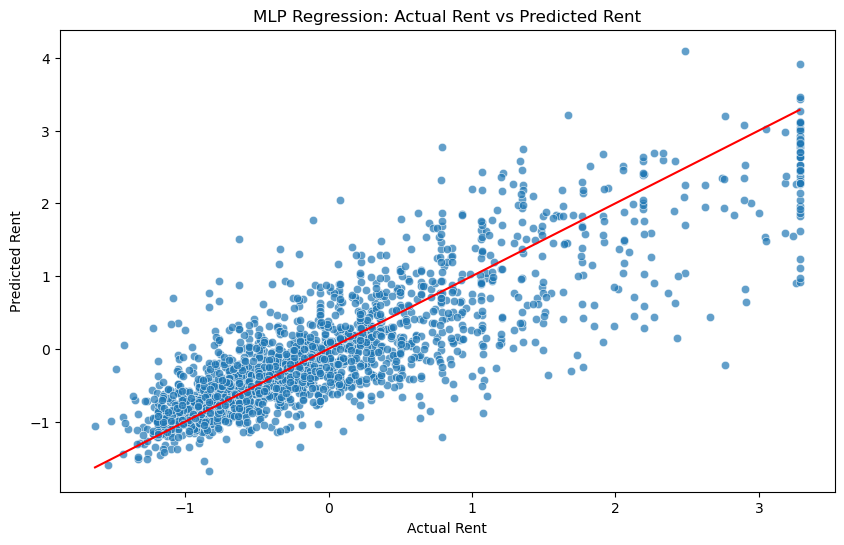

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_R, y=y_pred_R, alpha=0.7)
sns.lineplot(x=[min(y_test_R), max(y_test_R)], y=[min(y_test_R), max(y_test_R)], color='red')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MLP Regression: Actual Rent vs Predicted Rent")
plt.show()